In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import scipy.cluster.hierarchy as sch

#make sure matplotlib is exporting editable text
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
fp1 = '/Users/junyaokang/Desktop/TE/ML_Pyrite/data/TE_Data.csv'
TE_Data = pd.read_csv(fp1)

#get the data
X_Data = TE_Data.iloc[:, 3:].copy()

#get the label
labels = TE_Data.iloc[:, 2].copy()

#get the deposit style
sublabels = TE_Data.iloc[:, 1].copy()

feature_names = list(X_Data.columns)

#power transform and standardize the data
pt = PowerTransformer()
#fit the data
pt.fit(X_Data)
#transform the data, and then add column names to features
X_Data = pd.DataFrame(pt.transform(X_Data), columns = feature_names)

#Transposing the data
X_Data = X_Data.T

/Users/junyaokang/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


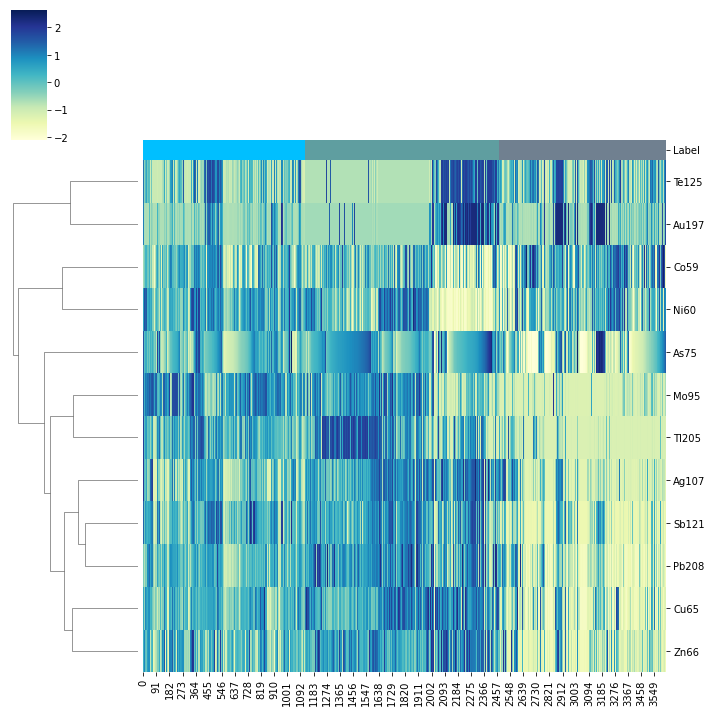

In [3]:
#create a color list for three types of pyrite
my_palette = dict(zip(labels.unique(), ['deepskyblue','cadetblue','slategray']))
col_colors = labels.map(my_palette)

#perfome hierarchical clustering and plot the data
sns.clustermap(X_Data, method = 'complete', col_cluster=False, cmap='YlGnBu', col_colors=col_colors)

plt.savefig("Cluster_Analysis.pdf", dpi=150)

/Users/junyaokang/opt/anaconda3/envs/ml_env/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


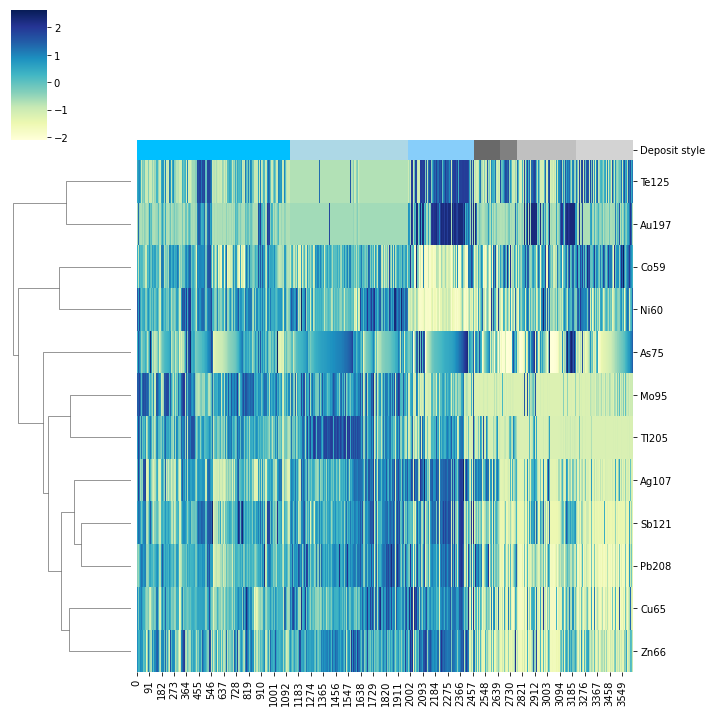

In [4]:
#create a color list for deposit style (Sedimentary, SEDEX, VHMS, Hydrothermal Breccia, IOCG, Orogenic Au, Porphyry)
my_palette = dict(zip(sublabels.unique(), ['deepskyblue','lightblue','lightskyblue','dimgray','grey','silver','lightgrey']))
col_colors = sublabels.map(my_palette)

#perfome hierarchical clustering and plot the data
sns.clustermap(X_Data, method = 'complete', col_cluster=False, cmap='YlGnBu', col_colors=col_colors)

plt.savefig("Cluster_Analysis_Sublabel.pdf", dpi=150)

In [5]:
#perform hierarchical clustering
Z = sch.linkage(X_Data, method = 'complete')

#Get the order of features (Trace Elements) after clustering
Leaves_clustered = sch.leaves_list(Z)

#Use the order to create a new feature_names list
feature_names_clustered = list()
for i in Leaves_clustered:
    feature_names_clustered.append(feature_names[i])

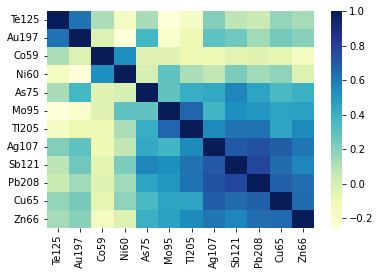

In [6]:
#reorder the dataframe using the clustered order of features
X_Data_Clustered = X_Data.reindex(feature_names_clustered)

#calculate correlation matrix
correlations_clustered = X_Data_Clustered.T.corr()

sns.heatmap(correlations_clustered, cmap='YlGnBu')

plt.savefig("Correlation Matrix.pdf", dpi=150)